<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Top 10 Industries by Respondent Count:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Name: count, dtype: int64


/tmp/ipykernel_1514/1053667208.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


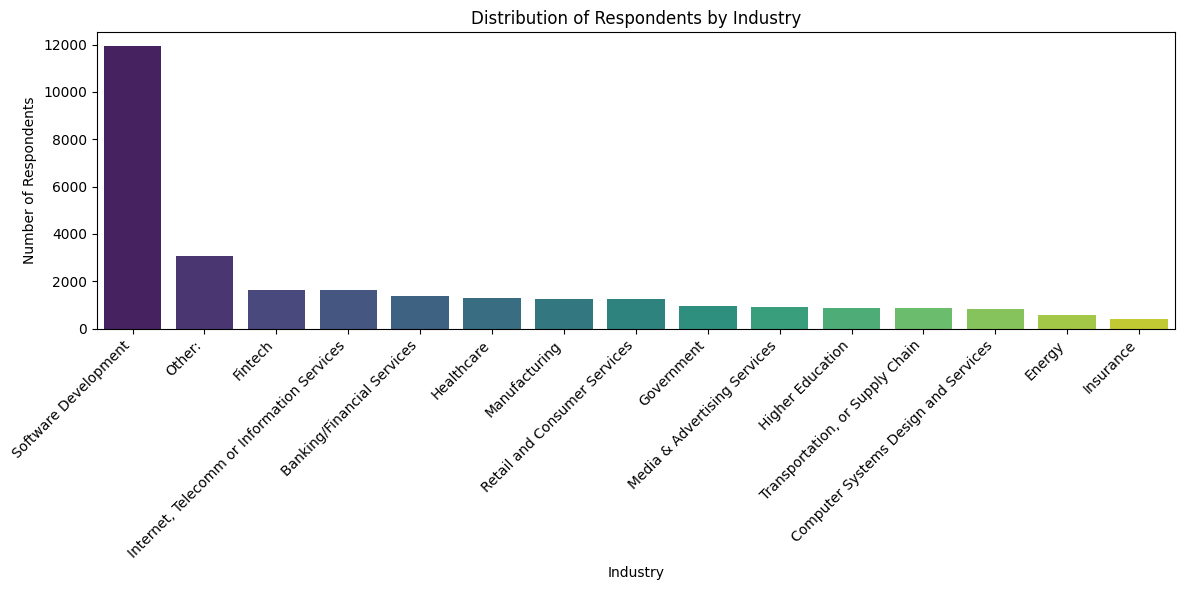

In [3]:
industry_counts = df['Industry'].value_counts()

print("Top 10 Industries by Respondent Count:")
print(industry_counts.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
comp = df['ConvertedCompYearly'].dropna()

mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"Mean yearly compensation: {mean_comp:.2f}")
print(f"Median yearly compensation: {median_comp:.2f}")
print(f"Standard deviation: {std_comp:.2f}")

threshold = mean_comp + 3*std_comp

high_earners = df[df['ConvertedCompYearly'] > threshold]

print(f"\nNumber of respondents above threshold ({threshold:.2f}): {high_earners.shape[0]}")
print(high_earners[['ConvertedCompYearly', 'Employment', 'EdLevel']].head(10))


Mean yearly compensation: 86155.29
Median yearly compensation: 65000.00
Standard deviation: 186756.97

Number of respondents above threshold (646426.21): 89
      ConvertedCompYearly                                         Employment  \
529              650000.0                                Employed, full-time   
828             1000000.0                                Employed, full-time   
1932             945000.0                                Employed, full-time   
2171             750000.0                                Employed, full-time   
2187            2000000.0                                Employed, full-time   
2316            1000000.0                                Employed, full-time   
2592             800000.0                                Employed, full-time   
3024            1302817.0  Employed, full-time;Independent contractor, fr...   
5934            1031099.0  Independent contractor, freelancer, or self-em...   
6735             650000.0                  

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


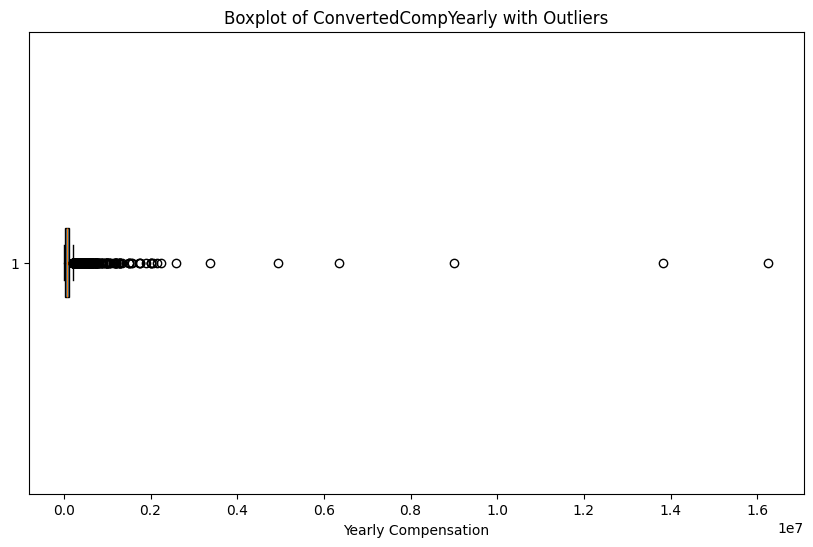

In [5]:
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


plt.figure(figsize=(10,6))
plt.boxplot(comp, vert=False, patch_artist=True, showfliers=True)
plt.title('Boxplot of ConvertedCompYearly with Outliers')
plt.xlabel('Yearly Compensation')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]

d_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print("Original dataset size:", df.shape[0])
print("New dataset size (without outliers):", d_no_outliers.shape[0])
print("Number of removed rows:", df.shape[0] - d_no_outliers.shape[0])

Original dataset size: 65437
New dataset size (without outliers): 22457
Number of removed rows: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


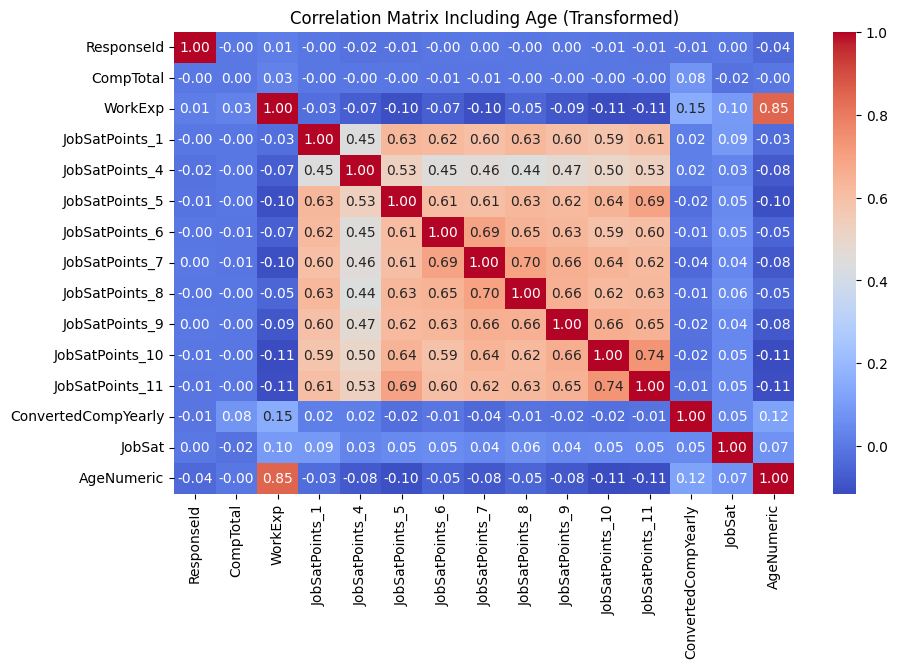


Correlation of Age with other numeric columns:
AgeNumeric             1.000000
WorkExp                0.851666
ConvertedCompYearly    0.121464
JobSat                 0.069463
CompTotal             -0.002841
JobSatPoints_1        -0.028127
ResponseId            -0.037806
JobSatPoints_8        -0.046353
JobSatPoints_6        -0.050851
JobSatPoints_4        -0.076001
JobSatPoints_9        -0.082013
JobSatPoints_7        -0.082715
JobSatPoints_5        -0.101691
JobSatPoints_11       -0.107229
JobSatPoints_10       -0.114497
Name: AgeNumeric, dtype: float64


In [7]:
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Age (Transformed)')
plt.show()

print("\nCorrelation of Age with other numeric columns:")
print(corr_matrix['AgeNumeric'].sort_values(ascending=False))

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
